# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed/Humidity.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from citipy import citipy
import openweathermapy.core as owm

## Generate Cities List

In [10]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

634

### Perform API Calls by Openweathermapy 
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each fail city which cannot be found by openweather API.


In [37]:
api_key = "787d8ccdd46ac611ebe814d9919e03cc"
#For temperature in Fahrenheit use units=imperial
settings = {"units": "imperial", "appid": api_key}
#In order to get information what I need from openweather 
summary = ["name","sys.country","coord.lat","coord.lon","dt","clouds.all","main.humidity","main.temp_max","wind.speed"]

#Create a empty list to store information
result = []

for i in range(len(cities)):
    try :
        current_weather = owm.get_current(cities[i], **settings)
        data = current_weather(*summary) #It would return values as tuple data type.
        result.append(data)
    except :
        print(f"{cities[i]} City not found. Skipping...")


vaitupu City not found. Skipping...
kuah City not found. Skipping...
tumannyy City not found. Skipping...
toliary City not found. Skipping...
belushya guba City not found. Skipping...
fort saint john City not found. Skipping...
krasnoselkup City not found. Skipping...
meyungs City not found. Skipping...
mys shmidta City not found. Skipping...
warqla City not found. Skipping...
chagda City not found. Skipping...
sentyabrskiy City not found. Skipping...
amderma City not found. Skipping...
acarau City not found. Skipping...
taolanaro City not found. Skipping...
tsihombe City not found. Skipping...
dahuk City not found. Skipping...
rawannawi City not found. Skipping...
lolua City not found. Skipping...
illoqqortoormiut City not found. Skipping...
attawapiskat City not found. Skipping...
perbaungan City not found. Skipping...
grand river south east City not found. Skipping...
juifang City not found. Skipping...
nizhneyansk City not found. Skipping...
galiwinku City not found. Skipping...
be

In [71]:
cities_weather = pd.DataFrame(result,columns=["Name","Country","Lat","Lng","Date","Cloudiness","Humidity","Max_Temp","Wind_Speed"])
print(cities_weather.shape) #We have total 563 cities for their current weather's information.
cities_weather.to_csv("cities_weather_data.csv")
cities_weather.head()


(563, 9)


,Name,Country,Lat,Lng,Date,Cloudiness,Humidity,Max_Temp,Wind_Speed
0,Camacha,PT,33.08,-16.33,1552870800,40,67,60.80,10.29
1,Belyy Yar,RU,53.60,91.39,1552870800,0,72,17.60,6.71
2,Coquimbo,CL,-29.95,-71.34,1552870800,0,82,59.00,4.70
3,Batagay-Alyta,RU,67.80,130.41,1552872734,12,64,-10.08,4.14
4,Sevsk,RU,52.15,34.49,1552872734,0,77,30.60,7.38


In [62]:
#Convert unix time to local time and return only yy-mm-dd
def unix_convert (utc_time):
    local_time = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(utc_time))
    local_time.split()[0]
    return(local_time.split()[0])

### Plotting the Data

#### Latitude vs. Temperature Plot

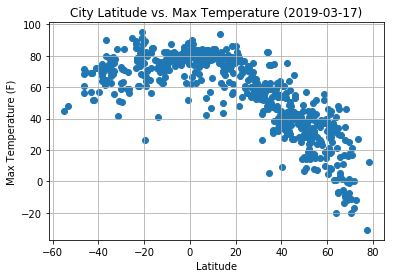

In [67]:
plt.scatter(cities_weather["Lat"],cities_weather["Max_Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature ({unix_convert(cities_weather.Date[0])})")
plt.grid()
plt.savefig("figure1.png")

#### Latitude vs. Humidity Plot

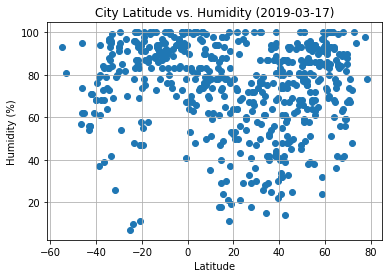

In [68]:
plt.scatter(cities_weather["Lat"],cities_weather["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({unix_convert(cities_weather.Date[0])})")
plt.grid()
plt.savefig("figure2.png")

#### Latitude vs. Cloudiness Plot

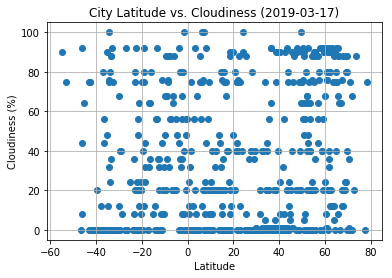

In [69]:
plt.scatter(cities_weather["Lat"],cities_weather["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({unix_convert(cities_weather.Date[0])})")
plt.grid()
plt.savefig("figure3.png")

#### Latitude vs. Wind Speed Plot

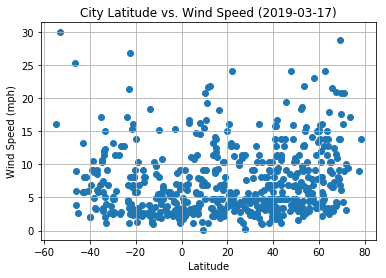

In [70]:
plt.scatter(cities_weather["Lat"],cities_weather["Wind_Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed ({unix_convert(cities_weather.Date[0])})")
plt.grid()
plt.savefig("figure4.png")